# Topics in Quantitative Finance, Summer 2020

## Lecture 4: Volatility and volatility-linked derivatives

### Tai-Ho Wang (王 太 和)
    
<h2><img src="BCstacked_blk.jpg" align = "center" height=50 width=190></h2>

$$
\newcommand{\bea}{\begin{eqnarray}}
\newcommand{\eea}{\end{eqnarray}}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\F}{\mathcal{F} }
\newcommand{\cF}{\mathcal{F} }
\newcommand{\E}{\mathbb{E} }
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\Etof}[1]{\mathbb{E}_t\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\ES{{ \mbox{ES} }}
\def\Var{{ \mbox{Var} }}
\def\VaR{{ \mbox{VaR} }}
\def\sd{{ \mbox{sd} }}
\def\corr{{ \mbox{corr} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\p}{\partial}
\newcommand{\PP}{\mathbb{P} }
\newcommand{\Pof}[1]{\mathbb{P}\left[ #1 \right]}
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\R}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
\newcommand{\Hess}{\mathrm{Hess} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bit}{\begin{itemize}}
\newcommand{\eit}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\tr}{\mbox{tr}}
\newcommand{\angl}[1]{\langle #1 \rangle}
$$


## Agenda

- Volatility and its various estimators
    - Historical volatility
    - Implied volatility
    - Realized variance
    - VIX 
- Volatility indices published by CBOE
- Volatility forecast
    - HAR
- Volatility linked derivatives

## What is volatility?

From the [Wikipage](https://en.wikipedia.org/wiki/Volatility_(finance)):

In finance, volatility (symbol $\sigma$) is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.

- Historic volatility measures a time series of past market prices. 
- Implied volatility looks forward in time, being derived from the market price of a market-traded derivative (in particular, an option). 
- Realized variance estimates the integrated variance or quadratic variation by using high frequency data.

## Why is volatility important?

From the same [Wikipage](https://en.wikipedia.org/wiki/Volatility_(finance)):

Investors care about volatility for at least the following reasons:

- The wider the swings in an investment's price, the harder emotionally it is to not worry;

- Price volatility of a trading instrument can define position sizing in a portfolio;

- When certain cash flows from selling a security are needed at a specific future date, higher volatility means a greater chance of a shortfall;

- Higher volatility of returns while saving for retirement results in a wider distribution of possible final portfolio values;

- Higher volatility of return when retired gives withdrawals a larger permanent impact on the portfolio's value;

- Price volatility presents opportunities to buy assets cheaply and sell when overpriced;

- <font color=blue> Portfolio volatility has a negative impact on the compound annual growth rate (CAGR) of that portfolio </font>

- Volatility affects pricing of options, being a parameter of the Black–Scholes model.

In today's markets, it is also possible to trade volatility directly, through the use of derivative securities such as options and variance swaps. 

## Volatilities

Volatiltiy of a financial asset in its most prelimanry form is defined as the (conditional) standard deviation of its log return. In practice, there exist various notions of "volatility" that are commonly used including  

- Historical volatility
- Realized and integrated variance/volatility
- Implied volatility 
- Instantaneous volatility 

and methods of inferring thees volatilities respectively from

- Daily or high-frequency time series data of the underlying
- Price series of variance swap
- Prices of liquidly traded vanilla options
 

## Historical volatility

Historical volatility uses, say daily, price series to calculate the sample conditional standard deviation of log returns in rolling windows.  

##  Example of historical volatility

Now let's calculate the volatility of S&P500 using 25-day rolling windows. 

The R function ``volatility`` in the ``quantmod`` package calculate the volatiltiy series of the input price series $S_t$, $1 \leq t \leq T$, by the following formula

$$
\sigma_t = \sqrt{\frac N{n-2}\sum_{i=1}^{n-1} (r_i - \bar r)^2}, \quad \mbox{ for } n \leq t \leq T,
$$

where 

\begin{eqnarray*}
&& r_i = \ln S_{t + i} - \ln S_{t + i - 1}, \mbox{ for } 1 \leq i \leq n - 1\\
&& \bar r = \frac1{n-1} \sum_{i=1}^{n-1} r_i. 
\end{eqnarray*}

### Note
- $n$ denotes the width (number of days) of rolling window
- $N$ denotes the number of days in a year
- $\sqrt N$ is the annualizing factor
- The first $n-1$ points in the output volatility series appear as NA, for an obvious reason.

### Exponetially weighted moving average (EWMA)
An alternative to calculate historical volatility is the *exponentially weighted moving average* method. 

$$
\sigma_t = \sqrt{N(1 - \lambda)\sum_{i=1}^{\infty} \lambda^i (r_{t - i} - \bar r)^2}, \quad \mbox{ for } n \leq t \leq T,
$$

for some $\lambda \in (0, 1)$.

In [14]:
# as always, rescale the plot
options(repr.plot.height=4)

In [15]:
# load required package quantmod
library(quantmod)

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.



'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "^GSPC"

[1] 1650    1

           GSPC.Adjusted
2014-01-02       1831.98
2014-01-03       1831.37
2014-01-06       1826.77
2014-01-07       1837.88
2014-01-08       1837.49
2014-01-09       1838.13

           GSPC.Adjusted
2020-07-15       3226.56
2020-07-16       3215.57
2020-07-17       3224.73
2020-07-20       3251.84
2020-07-21       3257.30
2020-07-22       3276.02

     Index            GSPC.Adjusted 
 Min.   :2014-01-02   Min.   :1742  
 1st Qu.:2015-08-21   1st Qu.:2063  
 Median :2017-04-11   Median :2368  
 Mean   :2017-04-11   Mean   :2421  
 3rd Qu.:2018-11-28   3rd Qu.:2783  
 Max.   :2020-07-22   Max.   :3386  

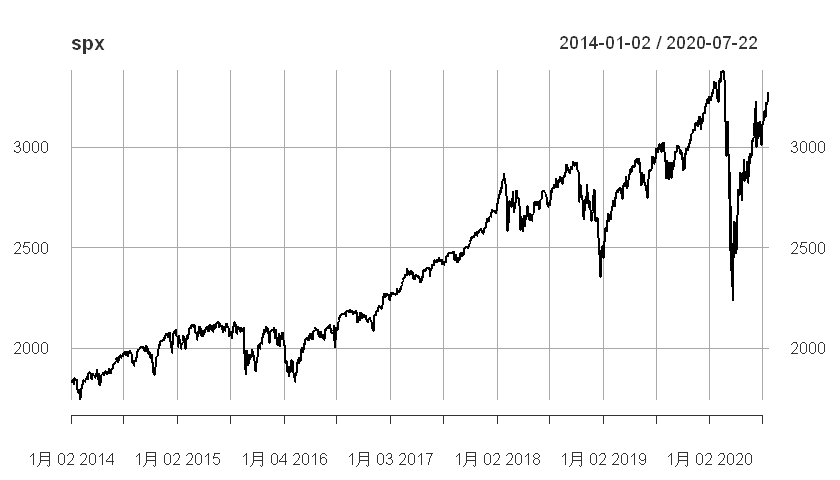

In [16]:
# download time series for SPX since 2014-01-01 from Yahoo Finance (default source)
getSymbols("^GSPC", from='2014-01-01')

# extract the dividend adjusted price/index
spx <- GSPC$GSPC.Adjusted

# dimension/size of the data
dim(spx)

# brief look at spx
head(spx)
tail(spx)

# summary statistics
summary(spx)

# plot spx
plot(spx)

           GSPC.Adjusted
2014-01-02            NA
2014-01-03 -0.0003330203
2014-01-06 -0.0025149269
2014-01-07  0.0060633452
2014-01-08 -0.0002122317
2014-01-09  0.0003482487

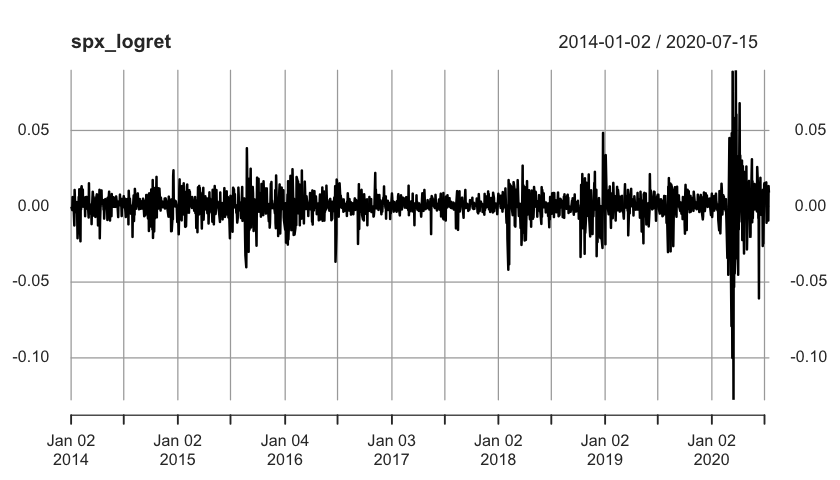

In [51]:
# calculate log return series for spx
spx_logret <- diff(log(spx))
head(spx_logret)

# plot spx log return
plot(spx_logret)

Warning message:
“timezone of object (UTC) is different than current timezone ().”

           [,1]
2014-01-02   NA
2014-01-03   NA
2014-01-06   NA
2014-01-07   NA
2014-01-08   NA
2014-01-09   NA

Warning message:
“timezone of object (UTC) is different than current timezone ().”

                [,1]
2020-07-08 0.2888853
2020-07-09 0.2893264
2020-07-10 0.2786257
2020-07-13 0.2770722
2020-07-14 0.2798265
2020-07-15 0.2807719

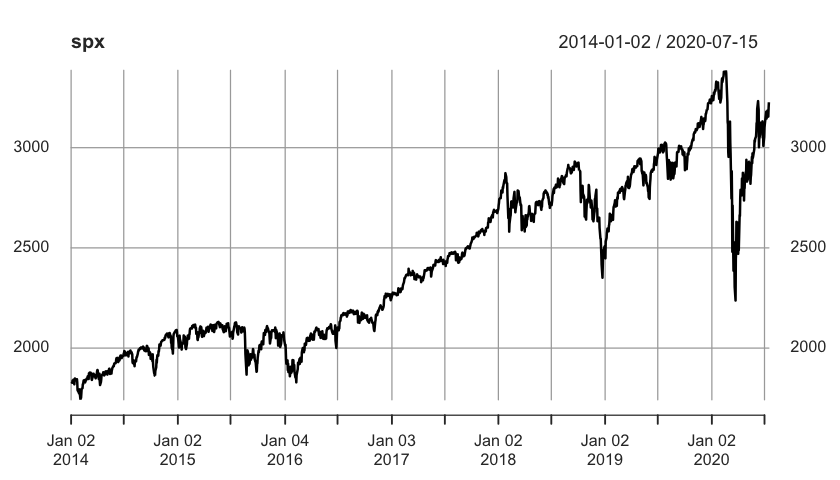

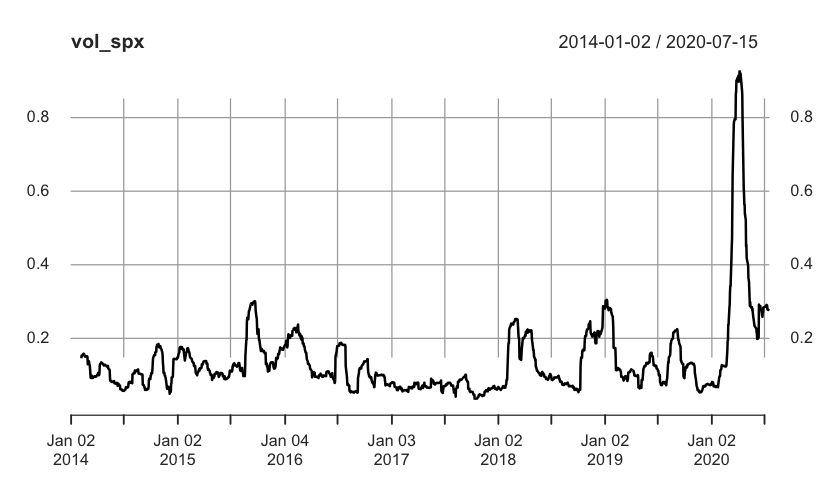

In [56]:
# calculate annualized vol series of spx log return, using 25-day rolling windows
vol_spx <- volatility(spx, n=25, N=252, calc='close')
# vol_spx <- volatility(spx, calc='close')

# brief look at spx vol series
head(vol_spx)
tail(vol_spx)

plot(spx)
plot(vol_spx)

# plot spx vol series using quantmod function chartSeries
#chartSeries(vol_spx)

In [54]:
volatility

function (OHLC, n = 10, calc = "close", N = 260, mean0 = FALSE, 
    ...) 
{
    OHLC <- try.xts(OHLC, error = as.matrix)
    calc <- match.arg(calc, c("close", "garman.klass", "parkinson", 
        "rogers.satchell", "gk.yz", "yang.zhang"))
    if (calc == "close") {
        if (NCOL(OHLC) == 1) {
            r <- ROC(OHLC[, 1], 1, ...)
        }
        else {
            r <- ROC(OHLC[, 4], 1, ...)
        }
        if (isTRUE(mean0)) {
            s <- sqrt(N) * sqrt(runSum(r^2, n - 1)/(n - 2))
        }
        else {
            s <- sqrt(N) * runSD(r, n - 1)
        }
    }
    if (calc == "garman.klass") {
        s <- sqrt(N/n * runSum(0.5 * log(OHLC[, 2]/OHLC[, 3])^2 - 
            (2 * log(2) - 1) * log(OHLC[, 4]/OHLC[, 1])^2, n))
    }
    if (calc == "parkinson") {
        s <- sqrt(N/(4 * n * log(2)) * runSum(log(OHLC[, 2]/OHLC[, 
            3])^2, n))
    }
    if (calc == "rogers.satchell") {
        s <- sqrt(N/n * runSum(log(OHLC[, 2]/OHLC[, 4]) * log(OHLC[, 
            2]/OHLC[, 1]) + log(OHLC[, 3]/OHLC[, 4]) * log(OHLC[, 
            3]/OHLC[, 1]), n))
    }
    if (calc == "gk.yz") {
        if (is.xts(OHLC)) {
            Cl1 <- lag.xts(OHLC[, 4])
        }
        else {
            Cl1 <- c(NA, OHLC[-NROW(OHLC), 4])
        }
        s <- sqrt(N/n * runSum(log(OHLC[, 1]/Cl1)^2 + 0.5 * log(OHLC[, 
            2]/OHLC[, 3])^2 - (2 * log(2) - 1) * log(OHLC[, 4]/OHLC[, 
            1])^2, n))
    }
    if (calc == "yang.zhang") {
        if (is.xts(OHLC)) {
            Cl1 <- lag.xts(OHLC[, 4])
        }
        else {
            Cl1 <- c(NA, OHLC[-NROW(OHLC), 4])
        }
        dots <- list(...)
        if (is.null(dots$alpha)) {
            alpha <- 1.34
        }
        if (is.null(dots$k)) {
            k <- (alpha - 1)/(alpha + (n + 1)/(n - 1))
        }
        s2o <- N * runVar(log(OHLC[, 1]/Cl1), n = n)
        s2c <- N * runVar(log(OHLC[, 4]/OHLC[, 1]), n = n)
        s2rs <- volatility(OHLC = OHLC, n = n, calc = "rogers.satchell", 
            N = N, ...)
        s <- sqrt(s2o + k * s2c + (1 - k) * (s2rs^2))
    }
    reclass(s, OHLC)
}
<bytecode: 0x7f9cc4a42d20>
<environment: namespace:TTR>

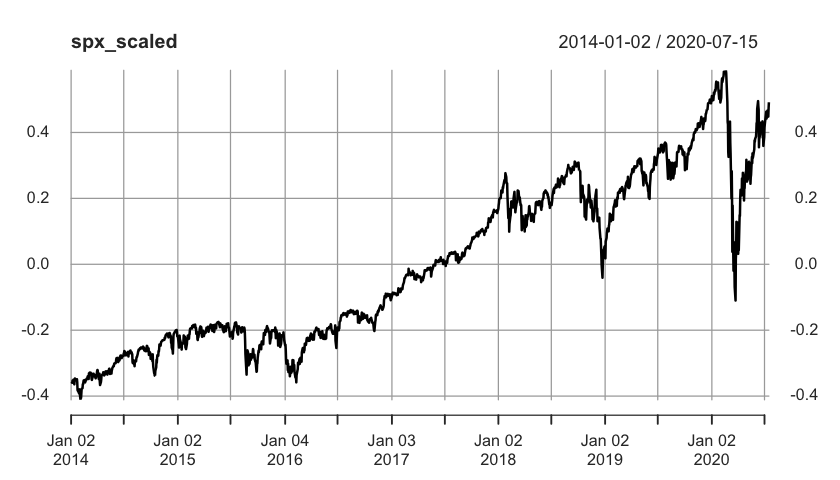

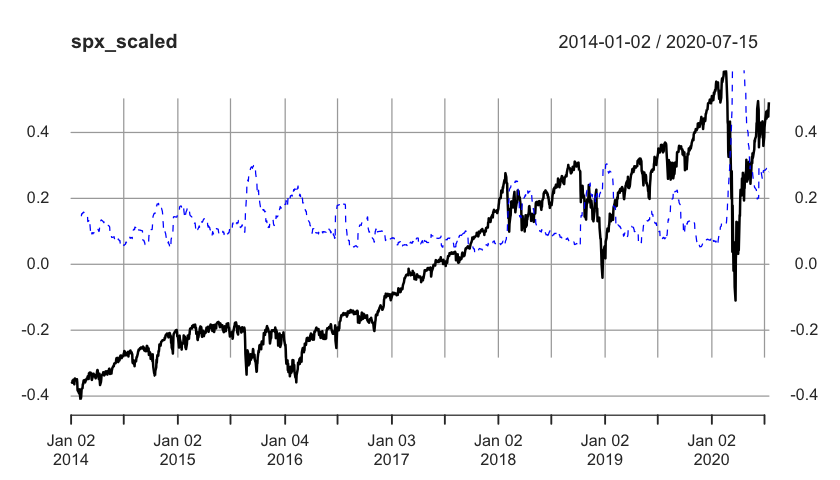

In [57]:
spx_scaled <- (spx - mean(spx))/(max(spx) - min(spx))
plot(spx_scaled)
lines(vol_spx, col='blue', lty=2)

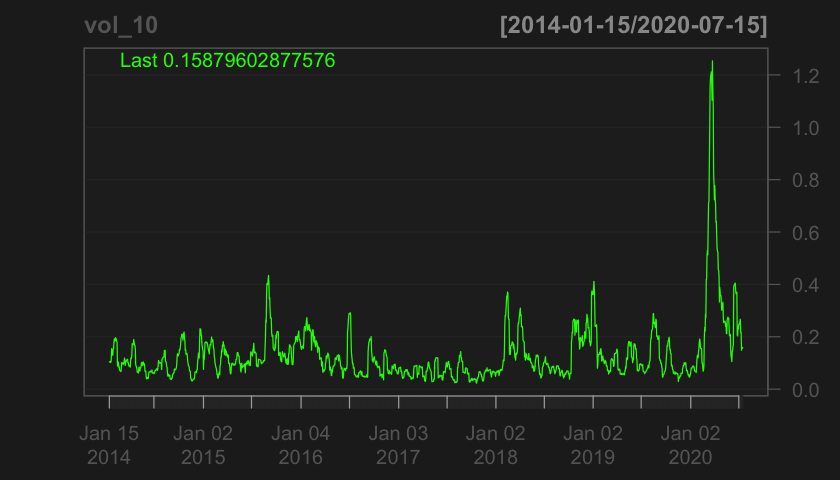

In [58]:
# the function volatility applies directly to GSPC data as well
vol_10 <- volatility(GSPC, n=10, N=252, calc='close')
chartSeries(vol_10)

## Volatility estimation using OHLC

- Parkison
- Garman-Klass
- Rogers-Satchell
- Yang-Zhang


\begin{eqnarray*}
&& \sigma_P^2 = \frac1{4\ln2} \frac1n\sum_{i=1}^n (\ln H_i - \ln L_i)^2 \\
&& \sigma_{GK}^2 = \frac1n \left\{\sum_{i=1}^n \frac12(\ln H_i - \ln L_i)^2 + (2\ln2 - 1)(\ln C_i - \ln O_i)^2 \right\} \\
&& \sigma_{RS}^2 = \frac1n \sum_{i=1}^n u_i(u_i - c_i) + d_i(d_i - c_i) \\
&& \sigma_{YZ}^2 = \sigma_O^2 + w\sigma_C^2 + (1 - w)\sigma_P^2, \quad w = \frac{0.34}{1.34 + \frac{n+1}{n-1}}.
\end{eqnarray*}

- $u_i = \ln H_i - \ln O_i$: daily high weighted by open, 
- $d_i = \ln L_i - \ln O_i$: daily low weighted by open
- $o_i = \ln O_i - \ln C_{i-1}$
- $c_i = \ln C_i - \ln O_i$

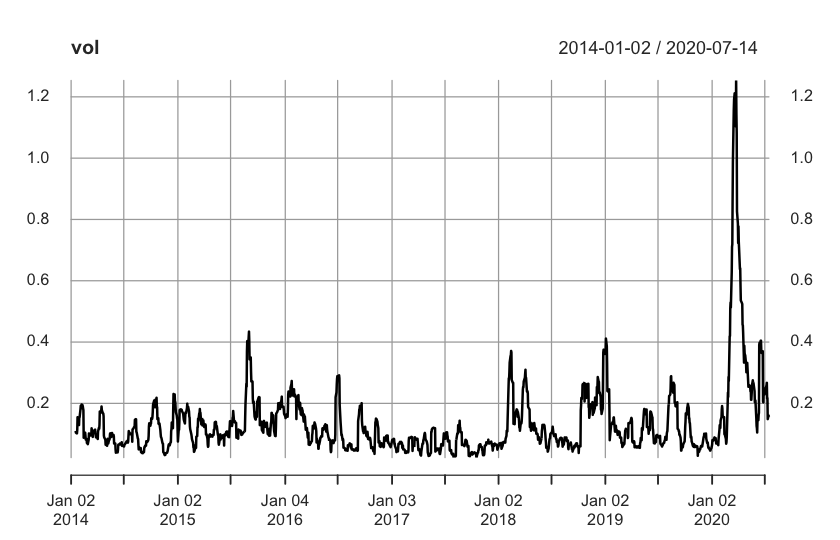

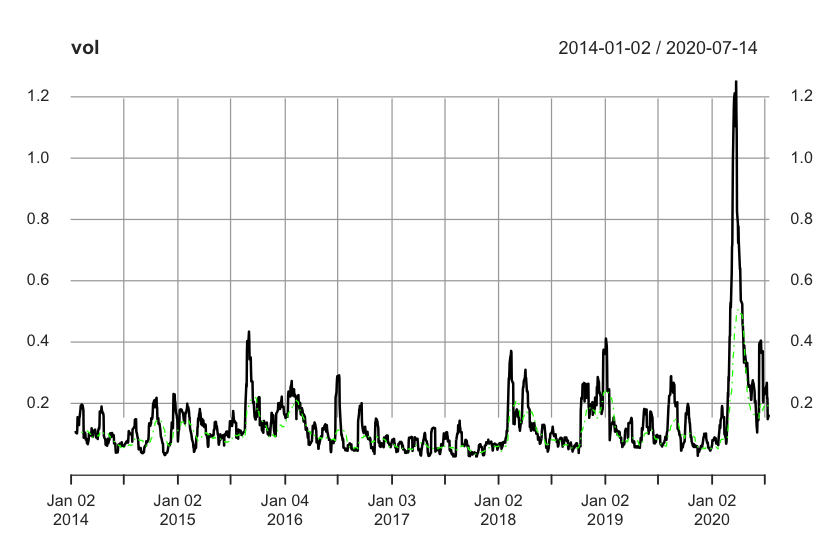

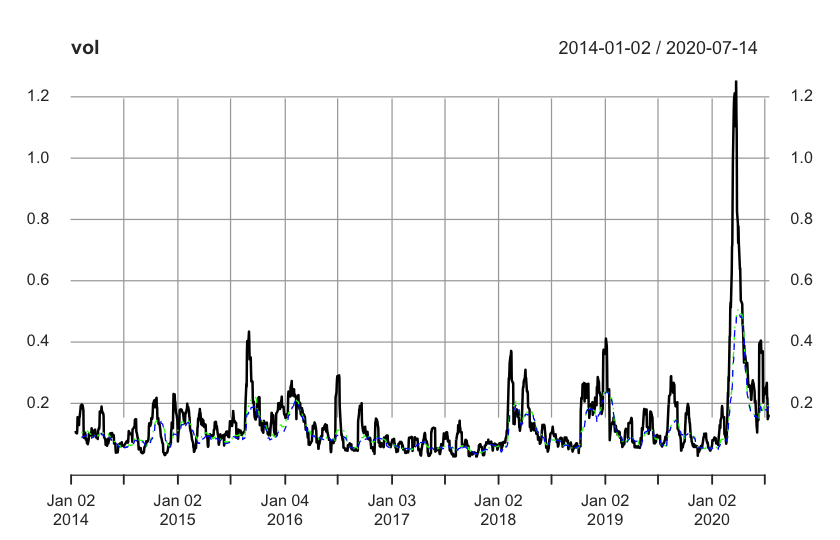

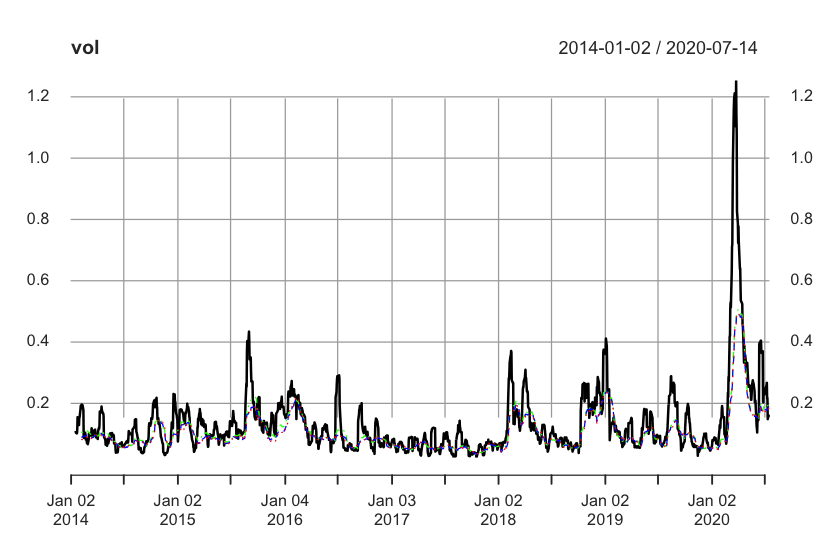

In [10]:
vol_p <- volatility(GSPC, n=25, N=252, calc='parkinson')
vol_gk <- volatility(GSPC, n=25, N=252, calc='garman.klass')
vol_rs <- volatility(GSPC, n=25, N=252, calc='rogers.satchell')

plot(vol)
lines(vol_p, col='green', lty=4)
lines(vol_gk, col='blue', lty=2)
lines(vol_rs, col='red', lty=3)

## Volatility estimation using high frequency data

- Market microstructure noise may contaminate the data in high frequency, resulting in inconsistency of estimators. 

## Realized variance

The following estimator is called the *Realized Variance (RV)* estimator

$$
\sum_{i=1}^n \, \left(Y_{t_i} - Y_{t_{i-1}} \right)^2
= \sum_{i=1}^n \, \left( \Delta Y_{t_i} \right)^2, 
$$ 

where $Y_t = \log S_t$ and $S_t$ is the price series of the asset under consideration.


### Technical notes

- Realized variance and realized covariance <br>
    Given a partition $\Pi = \{0 = t_1 < \cdots < t_n=T\}$ of the interval $[0, T]$, the realized variance $[X]_T^\Pi$ of the process $X_t$ sampled at $\Pi$ is defined by
$$
[X]_T^\Pi = \sum_{i=1}^n |X_{t_i} - X_{t_{i-1}}|^2.
$$
    Similiarly, the realized covariance between $X_t$ and $Y_t$ sampled at $\Pi$ is given by 
$$
[X, Y]_T^\Pi = \sum_{i=1}^n (X_{t_i} - X_{t_{i-1}})(Y_{t_i} - Y_{t_{i-1}})
$$

- Quadratic variation (integrated variance) and covariation <br>
    The quadratic variation of $X$ is defined by the limit
    $$
    \angl{X}_t = \lim_{\|\Pi_n\| \to 0} [X]_T^{\Pi_n} 
    $$
    provided the limit exists. $\Pi_n$ denotes a sequence of partitions of the interval $[0, T]$ such that $\|\Pi_n\| \to 0$ as $n \to \infty$, where $\|\Pi_n\|$ denotes the mesh of the partition $\Pi_n$. 

    Likewise, the covariation between and $X$ and $Y$ is defined by the limit
    $$
    \angl{X, Y}_t = \lim_{\|\Pi_n\| \to 0} [X, Y]_T^{\Pi_n}.
    $$



### Assumption
The log price $X_t$ follows the Ito process

$$
dX_t = \mu_t dt + \sigma_t dW_t,
$$

where $W_t$ is a Brownian motion. Under the assumption,
$\angl{X}_t = \int_0^t \sigma_\tau^2 d\tau$.



## Integrated variance or quadratic variation

Given a set of tick data, how can we measure the, say daily, variance? <br>
A possibility is to estimate the *integrated variance*, also known as the *quadratic variation* in the theory of semimartingale. We shall use both terms interchangeably hereafter. 

Recall that the *quadratic variation* $\angl{X}_t$ of the continuous stochastic process $X_t$ is defined by 

$$
\angl{X}_T:= \lim_{\|\Pi_n\| \to 0} \sum_{{t_i} \in \Pi_n} |\Delta X_{t_i}|^2
$$

provided the limit exist (in probability). 

Thus, the goal is to estimate the quadratic variation of the efficient log price from the transacted log price, i.e., tick data. However, the subtlety is that efficient price is not directly observable and is contaminated by market microstructure noises.

#### Note
- If the process $X$ has jumps, the quadratic variation $\angl{X}$ becomes

    $$
    \angl{X}_t = \angl{X^c}_t + \sum_{0 < s \leq t} |\Delta X_s|^2,
    $$

    where $X^c$ denotes the continuous part of $X$ and $\Delta X_s := X_s - X_{s^-}$ is the jump size at time $s$. In this case, the integrated variance usually refers to $\angl{X^c}$, i.e., the quadratic variation of the continuous part. 

- We shall always assume $X$ is a continuous process, thus no jumps, in the sequel. 

### Microstructure noise

In the limit of very high sampling frequency, RV picks up mainly the market
microstructure noise. To see this, suppose that the observed price $Y_t$
is given by

$$Y_t =X_t +\epsilon_t,$$

where $X_t$ is the value of the
underlying (log-)price process of interest and $\epsilon_t$ is a random
market microstructure-related noise term, assumed independent of $X_t$. Suppose we sample the price
series $n+1$ times (so that there are $n$ price changes) at $\Pi=\{0=t_0 < \cdots < t_n = T\}$ in the time interval $[0, T]$. 

Note that, conditioned on $\cF_T^X$, the conditional expectation of the realized variance of transacted (log) price satisties

\begin{eqnarray*}
\Eof{[Y]_T^\Pi |\cF_T^X} &:=& \sum_{i=1}^n \Eof{(\Delta Y_{t_i})^2|\cF_T^X} \\
&=& \sum_{i=1}^n \, (\Delta X_{t_i})^2 + 2 \sum_{i=1}^n \Delta X_{t_i} \Eof{\Delta \epsilon_{t_i}|\cF_T^X} + \sum_{i=1}^n \Eof{(\Delta \epsilon_{t_i})^2|\cF_T^X} \\
&=& [X]_T + 2 n \, \mbox{var}[\epsilon] \\
&\approx& \angl{X}_T + 2 n \, \mbox{var}[\epsilon].
\end{eqnarray*}

#### Note
The difference between $[X]_T$ and $\angl{X}_T$ is referred to as the *discretization error*, which is usually controled by the integrated quarticity $\int_0^T \sigma_t^4 dt$. 

### Asymptotic result

A more detailed, but more technical, asymptotic analysis shown in [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup> yields that as $n \to \infty$

$$
[Y]^{\Pi}_T \mathop{\approx}^{\mathcal L} \angl{X}_T + 2 \, n \, \mbox{var}[\epsilon] + \sqrt{ 4 n \Eof{\epsilon^4} + \frac{2T}{n} \int_0^T \sigma_t^4 dt} \; Z,
$$

where $Z \sim N(0,1)$.

#### Note
- The naive RV estimator $[Y]_T^\Pi$ is biased by the variance of market microstructure noise $\epsilon$. The biasedness increases as the sampling frequency $n$ increases.  
- We see that as $n\to\infty$, the naive RV estimator $[Y]_T^\Pi$ picks up mainly the microstructure noise.

### The conventional solution

-   The conventional solution is to sample at most every five minutes or
    so.

    -  For high frequency data, sampling only every 5 minutes usually corresponds to throwing out more than 99% of the points!
        
-   To quote [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup>, “It is difficult to accept
    that throwing away data, especially in such quantities, can be an
    optimal solution.”

-   From a more practical perspective, if we believe that volatility is
    time-varying, it makes sense to try and measure it from recent data
    over the last few minutes rather than from a whole day of trading.

### Subsampling

Let $\Pi^{(k)} = \{0 \leq t_0^{(k)} < \cdots < t_{n_k}^{(k)}\leq T\}$, for $1 \leq k \leq K$, be a collection of nonoverlapping subsampling times in $\Pi$. That is, 

$$
\bigcup_{k=1}^K \Pi^{(k)} = \Pi \quad \mbox{ and } \quad \Pi^{(k)} \cap \Pi^{(\ell)} = \emptyset \; \mbox{for } k \neq \ell.
$$

A typical example that we shall be using in the following is by sampling every $K$ ticks from the $k$th tick on. That is, 

\begin{eqnarray*}
&& \Pi^{(1)} = \{t_1 < t_{1+K} < t_{1 + 2K} < \cdots < t_{1 + n_1 K} \leq T \}, \\
&& \Pi^{(2)} = \{t_2 < t_{2+K} < t_{2 + 2K}< \cdots < t_{2 + n_2 K} \leq T \}, \\
&& \qquad \vdots \\
&& \Pi^{(K)} = \{t_0 < t_K < t_{2K}  < \cdots < t_{n_K K} \leq  T \}.
\end{eqnarray*}

We denote by $[Y]_T^{\Pi^{(k)}}$ the RV estimate of $Y$ using the subsamples that are sampled from the sampling times in $\Pi^{(k)}$, for $1 \leq k \leq K$.

By the same token, we have the following asymptotics for each subsample $k \in \{1, \cdots, K\}$

$$
[Y]^{\Pi^{(k)}}_T \mathop{\approx}^{\mathcal L} \angl{X}_T + 2 \, n_k \, \mbox{var}[\epsilon] + \sqrt{ 4 n_k \Eof{\epsilon^4} + \frac{2T}{n_k} \int_0^T \sigma_t^4 dt} \; Z_k
$$

where $Z_k \sim N(0,1)$.

### Boosting RV estimator

We can boost the RV estimator by averaging over the "weak learners" $[Y]_T^{\Pi^{(k)}}$

\begin{eqnarray*}
[Y]_T^{avg} &=& \frac{1}{K} \, \sum_{k=1}^K \, [Y]_T^{\Pi^{(k)}} \\
&\approx& \angl{X}_T + 2 \, \bar n_K \, \mbox{var}[\epsilon] + \sqrt{ 4 \frac{\bar n_K}K \Eof{\epsilon^4} + \frac{4T}{3 \bar n_K} \int_0^T \sigma_t^4 dt} \; Z
\end{eqnarray*}
    
where $\bar n_K := \frac1K \sum_k n_k $ is the average number of ticks in each subsample, roughly equal to $\frac nK$.


#### Note
- Boosting reduces biasedness and variance by a factor of $K$, but is unable to completely remove the biasedness.
- The optimal average subsample size $\bar n^*$ is given by
$$
\bar n^* = \sqrt[3]{\frac T{6\mbox{var}^2[\epsilon]} \int_0^T \sigma_t^4 dt}.
$$
    Thus, the whole sample set is splitted into roughly $K^* \approx \frac n{\bar n^*}$ sets of subsamples.

### The ZMA estimator

Recall that 

\begin{eqnarray*}
&& [Y]^\Pi_T \approx \angl{X}_T + n \, \mbox{var}[\epsilon], \\
&& [Y]^{avg}_T \approx \angl{X}_T + \bar n_K \mbox{var}[\epsilon].
\end{eqnarray*}

We can eliminate bias by forming

\begin{eqnarray*}
\frac1{\bar n_K}[Y]_T^{avg} - \frac1n \, [Y]_T^\Pi \approx \left( \frac1{\bar n_K} - \frac1n \right) \angl{X}_T.
\end{eqnarray*}

Thus we obtain the [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup> (ZMA) bias-corrected
estimator of $\angl{X}_T$:

$$
[Y]_T^{ZMA} := \frac{1}{n - \bar n_K} \, \left\{n \, [Y]_T^{avg} - \bar n_K \, [Y]^\Pi_T \right\}.
$$

Moreover, we have the asymptotic behavior for $[Y]_T^{ZMA}$ as

$$
[Y]_T^{ZMA} \approx \angl{X}_T + \frac1{\sqrt[6]n}\sqrt{\frac8{c^2}\mbox{var}^2[\epsilon] + c \frac{4T}3 \int_0^T \sigma_t^4 dt} \; Z
$$

where $Z \sim N(0,1)$. The optimal constant $c^*$ is given by

$$
c^* = \left(\frac T{12 \, \mbox{var}^2[\epsilon]} \int_0^T \sigma_t^4 dt \right)^{-\frac13}.
$$

#### Note
In the original paper [Zhang, Mykland and Aït-Sahalia]<sup id="cite_ref-ZMA" class="reference"><a href="#cite_note-ZMA">[9]</a></sup>, the authors suggested the estimator as $[Y]_T^{avg} - \frac{\bar n_K}{n}[Y]_T^\Pi$, whereas the estimator $[Y]_T^{ZMA}$ obtained above is referred to as the *small-sample adjustment* in the paper. 

### The Zhou estimator

Define

$$
\begin{eqnarray*}
[Y]_T^{\Pi, Z}: &=& \sum_{i=1}^n \, (\Delta Y_{t_i})^2
+ \sum_{i=2}^n \, \Delta Y_{t_i} \, \Delta Y_{t_{i-1}} + \sum_{i=1}^{n-1} \, \Delta Y_{t_i} \Delta Y_{t_{i+1}} \\
&=& \sum_{i=1}^n \,(Y_{t_i} - Y_{t_{i-1}})(Y_{t_{i+1}} - Y_{t_{i-2}}).
\end{eqnarray*}
$$
Thus, under the assumption $Y = X + \epsilon$ of serially uncorrelated
noise independent of returns $X$, we obtain
$\mathbb{E}\left[[Y]^{\Pi, Z}\right] = \Eof{[X]_T}$. 

By further assume $X_t = \sigma W_{\tau(t)}$ (a time-changed Brownian motion) for some Brownian motion $W$ and deterministic increasing function $\tau(\cdot)$, since 

$$
\Eof{(\Delta X_{t_i})^2} = \sigma^2 \Eof{\left\{ W_{\tau(t_i)} - W_{\tau(t_{i-1})} \right\}^2} = \sigma^2 \{\tau(t_i) - \tau(t_{i-1})\},
$$

we have

$$
\mathbb{E}\left[[Y]^{\Pi, Z}\right] = \sigma^2 \{\tau(T) - \tau(0) \} = \angl{X}_T.
$$

In other words, in this case $[Y]^{\Pi, Z}$ is an unbiased estimator of $\angl{X}_T$.

In [1]:
# install package highfrequency, if necessary
install.packages('highfrequency', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/lzx_03/Documents/R/win-library/3.6'
(as 'lib' is unspecified)

also installing the dependencies 'generics', 'RcppRoll', 'lubridate'




package 'generics' successfully unpacked and MD5 sums checked
package 'RcppRoll' successfully unpacked and MD5 sums checked
package 'lubridate' successfully unpacked and MD5 sums checked
package 'highfrequency' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lzx_03\AppData\Local\Temp\RtmpQVhAV3\downloaded_packages


In [11]:
# load required package highfrequency
library(highfrequency)

# load realized_library data from highfrequency
data(realized_library)


# see what kind of data inside
colnames(realized_library)

[1] "date"          "symbol"        "open_to_close" "rk_twoscale"  
 [5] "rk_th2"        "medrv"         "rsv_ss"        "close_price"  
 [9] "nobs"          "bv_ss"         "rv10"          "rv5_ss"       
[13] "open_time"     "rv5"           "rsv"           "rk_parzen"    
[17] "rv10_ss"       "bv"            "open_price"    "close_time"

In [12]:
realized_library

date,symbol,open_to_close,rk_twoscale,rk_th2,medrv,rsv_ss,close_price,nobs,bv_ss,rv10,rv5_ss,open_time,rv5,rsv,rk_parzen,rv10_ss,bv,open_price,close_time
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-01-03,.SPX,-0.0116017641,1.217324e-04,1.301572e-04,5.774516e-05,9.613344e-05,1454.24,1554,1.410463e-04,1.640177e-04,1.408148e-04,83004,1.408148e-04,9.613344e-05,3.399264e-04,1.640177e-04,1.410463e-04,1471.21,145959
2000-01-04,.SPX,-0.0351016718,1.423208e-04,1.622259e-04,6.696694e-05,1.800632e-04,1399.02,1564,1.733171e-04,2.948200e-04,2.241312e-04,83009,2.241312e-04,1.800632e-04,2.152713e-04,2.948200e-04,1.733171e-04,1449.00,150000
2000-01-05,.SPX,0.0046252196,2.190494e-04,2.398365e-04,1.417521e-04,1.308485e-04,1402.09,1552,3.027452e-04,2.671639e-04,3.142822e-04,83012,3.142822e-04,1.308485e-04,1.627652e-04,2.671639e-04,3.027452e-04,1395.62,150003
2000-01-06,.SPX,0.0029907979,1.265870e-04,1.322324e-04,7.006091e-05,5.569460e-05,1403.06,1561,1.284442e-04,1.150001e-04,1.308097e-04,83005,1.308097e-04,5.569460e-05,6.659504e-05,1.150001e-04,1.284442e-04,1398.87,145954
2000-01-07,.SPX,0.0262927859,9.090790e-05,9.486773e-05,4.933782e-05,2.305608e-05,1440.84,1540,7.870593e-05,1.214602e-04,9.362177e-05,83000,9.362177e-05,2.305608e-05,2.154845e-04,1.214602e-04,7.870593e-05,1403.45,150000
2000-01-10,.SPX,0.0106062803,1.056449e-04,1.121113e-04,6.747072e-05,3.436810e-05,1456.84,1573,1.357494e-04,1.186118e-04,1.202127e-04,83006,1.202127e-04,3.436810e-05,2.119718e-04,1.186118e-04,1.357494e-04,1441.47,145956
2000-01-11,.SPX,-0.0126153691,7.225255e-05,7.454853e-05,4.655769e-05,4.673360e-05,1438.33,1523,6.805402e-05,6.862781e-05,6.809920e-05,83009,6.809920e-05,4.673360e-05,6.860088e-05,6.862781e-05,6.805402e-05,1456.59,145953
2000-01-12,.SPX,-0.0045775280,1.106643e-04,1.145849e-04,9.607269e-05,6.667482e-05,1431.99,1549,1.132528e-04,1.083989e-04,1.230023e-04,83001,1.230023e-04,6.667482e-05,6.902541e-05,1.083989e-04,1.132528e-04,1438.56,145949
2000-01-13,.SPX,0.0122272629,8.621114e-05,9.077539e-05,2.750390e-05,2.408297e-05,1449.87,1539,5.486989e-05,1.036310e-04,1.013277e-04,83000,1.013277e-04,2.408297e-05,6.070831e-05,1.036310e-04,5.486989e-05,1432.25,145958


In [17]:
dji_rv <- realized_library$Dow.Jones.Industrials.Realized.Variance

Warning message:
"Unknown or uninitialised column: 'Dow.Jones.Industrials.Realized.Variance'."


## Implied volatility

"A wrong number to a wrong formula for a correct answer."

- In the Black-Scholes model there is a one-to-one relation between the price of the option and the volatility parameter $\sigma$. The option prices are often quoted by stating this specific volatility, called the *implied volatility*.

- In Black-Scholes world, the volatility is assumed constant. But in reality, options of different strike require different volatilities to match their market prices. This is called the *volatility smile*.

- Most of the work was inspired in modeling the implied volatility.

## Why implied volatility rather than the price itself?

- Price of a call option is decreasing in strike and increasing in time to expiry
- Price of a far out-of-money option is small whereas price of a far in-the-money option carries mostly the intrinsic value
- Statistically speaking, implied volatility is a more standard quantity to infer
- Traders trade options in terms of implied volatilities rather than their prices

## A practical tip for fetching risk free and dividend rates

Q: How to obtain the interest rate $r$ and dividend rate $d$ for the calculation of implied volatility?

A: Put-call parity.

Recall the Put-Call Parity for European options

$$
C - P = Se^{-dT}  - K e^{-rT} = e^{-rT} (F - K),
$$

where $F$ denotes the forward price of the underlying. 
Hence, if we regress $C - P$ against $K$, the (negative) slope gives us the discount factor and the intercept gives the ex-dividend underlying.  

## Example - Implied volatilities of options on SPX

In [33]:
spx.opt <- getOptionChain("^SPX", '2020-08-14')

In [34]:
spx.calls <- spx.opt$calls
spx.puts <- spx.opt$puts

# see what is in the data
head(spx.calls)
head(spx.puts)

,Strike,Last,Chg,Bid,Ask,Vol,OI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
SPXW200814C02000000,2000,1152.10,0,1268.1,1274.8,NA,1
SPXW200814C02200000,2200,964.00,0,1068.5,1075.1,NA,1
SPXW200814C02250000,2250,886.60,0,1018.6,1025.3,NA,1
SPXW200814C02550000,2550,603.67,0,719.9,726.1,8,8
SPXW200814C02600000,2600,562.46,0,670.2,676.7,8,9
SPXW200814C02625000,2625,538.51,0,645.4,651.9,NA,8


,Strike,Last,Chg,Bid,Ask,Vol,OI
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
SPXW200814P00700000,700,0.05,0.0,0,0.05,90,90
SPXW200814P00900000,900,0.05,0.0,0,0.10,NA,90
SPXW200814P01000000,1000,0.10,0.0,0,0.10,2,153
SPXW200814P01200000,1200,0.05,0.0,0,0.15,125,145
SPXW200814P01300000,1300,0.10,0.0,0,0.10,260,653
SPXW200814P01400000,1400,0.10,-0.1,0,0.15,170,208


In [35]:
c.K <- spx.calls$Strike
p.K <- spx.puts$Strike

# extract calls and puts that have common strikes
ks <- intersect(c.K, p.K)
c.bid <- rep(0, length(ks)) 
c.ask <- rep(0, length(ks))
for (i in 1:length(ks)) {
    c.bid[i] <- spx.calls[spx.calls$Strike==ks[i], ]$Bid
    c.ask[i] <- spx.calls[spx.calls$Strike==ks[i], ]$Ask
}

c.mid <- (c.bid + c.ask)/2

p.bid <- 0*(1:length(ks))
p.ask <- 0*(1:length(ks))
for (i in 1:length(ks)) {
    p.bid[i] <- spx.puts[spx.puts$Strike==ks[i], ]$Bid
    p.ask[i] <- spx.puts[spx.puts$Strike==ks[i], ]$Ask
}

p.mid <- (p.bid + p.ask)/2

# display the result
data.frame(ks, c.bid, c.mid, c.ask, p.bid, p.mid, p.ask)

ks,c.bid,c.mid,c.ask,p.bid,p.mid,p.ask
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,1268.1,1271.45,1274.8,0.40,0.475,0.55
2200,1068.5,1071.80,1075.1,0.70,0.775,0.85
2250,1018.6,1021.95,1025.3,0.85,0.925,1.00
2550,719.9,723.00,726.1,2.05,2.150,2.25
2600,670.2,673.45,676.7,2.40,2.500,2.60
2625,645.4,648.65,651.9,2.60,2.675,2.75
2675,595.9,599.15,602.4,3.00,3.150,3.30
2700,571.1,574.25,577.4,3.30,3.400,3.50
2720,551.5,554.55,557.6,3.50,3.650,3.80


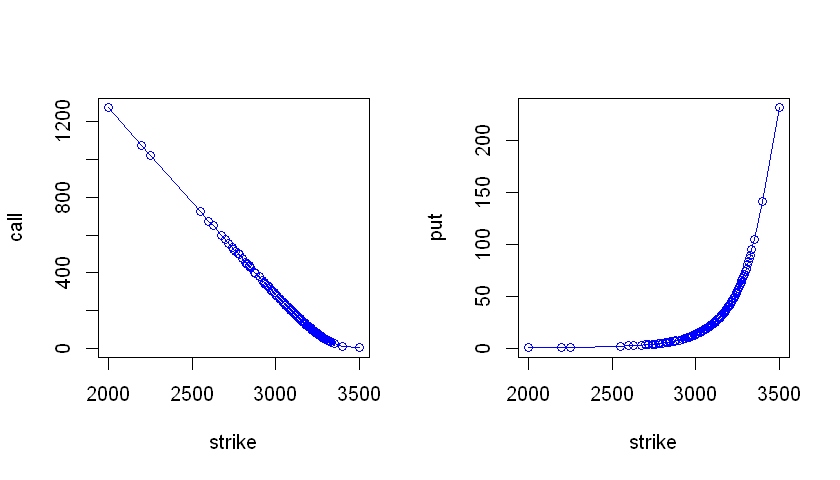

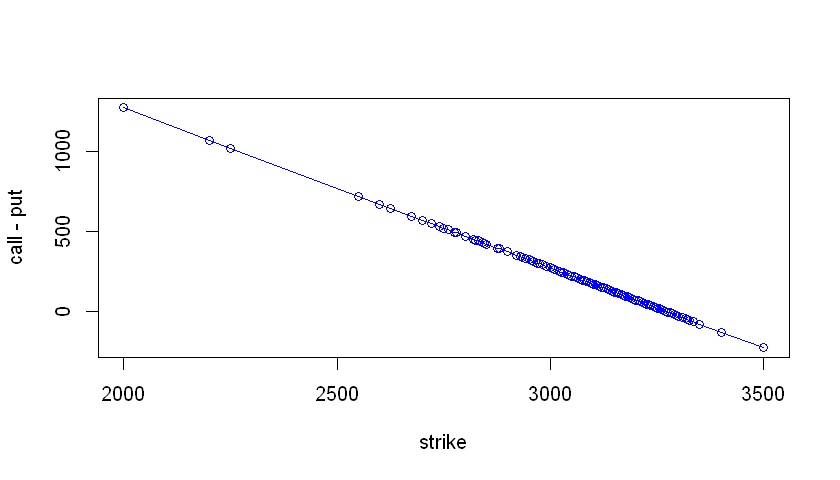

In [22]:
par(mfrow=c(1, 2))
plot(ks, c.mid, col='blue', type='o', xlab='strike', ylab='call')
plot(ks, p.mid, col='blue', type='o', xlab='strike', ylab='put')
par(mfrow=c(1, 1))
plot(ks, c.mid - p.mid, col='blue', type='o', xlab='strike', ylab='call - put')

In [23]:
# apply put-call parity 
cp.fit <- lm(c.mid - p.mid ~ ks)
cp.fit
summary(cp.fit)

# discount factor
PV <- -coef(cp.fit)[2]

# dividend adjusted underlying price
s_adj <- coef(cp.fit)[1]

data.frame(s_adj, PV)


Call:
lm(formula = c.mid - p.mid ~ ks)

Coefficients:
(Intercept)           ks  
  3269.7517      -0.9995  



Call:
lm(formula = c.mid - p.mid ~ ks)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32189 -0.08347  0.01039  0.09473  0.34105 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.270e+03  1.781e-01   18360   <2e-16 ***
ks          -9.995e-01  5.840e-05  -17117   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1462 on 99 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:      1 
F-statistic: 2.93e+08 on 1 and 99 DF,  p-value: < 2.2e-16


,s_adj,PV
,<dbl>,<dbl>
(Intercept),3269.752,0.9995368


In [27]:
# discounted strike
ks_pv <- PV*ks

data.frame(c.mid, ks_pv)

c.mid,ks_pv
<dbl>,<dbl>
1271.45,1999.074
1071.80,2198.981
1021.95,2248.958
723.00,2548.819
673.45,2598.796
648.65,2623.784
599.15,2673.761
574.25,2698.749
554.55,2718.740


In [28]:
# Black-Scholes formula
BSFormula <- function(s, K, t, r, sigma){
    d1 <- (log(s/K) + r*t)/(sigma*sqrt(t)) + sigma*sqrt(t)/2
    d2 <- d1 - sigma*sqrt(t)
    
    s*pnorm(d1) - K*exp(-r*t)*pnorm(d2)
}

In [29]:
# function calculating implied vol, code by Jim Gatheral
BSImpliedVolCall <- function(S0, K, T, r, C) {
    nK <- length(K)
    sigmaL <- rep(1e-10, nK)
    CL <- BSFormula(S0, K, T, r, sigmaL)
    sigmaH <- rep(10, nK)
    CH <- BSFormula(S0, K, T, r, sigmaH)
    while (mean(sigmaH - sigmaL) > 1e-10) {
        sigma <- (sigmaL + sigmaH)/2
        CM <- BSFormula(S0, K, T, r, sigma)
        CL <- CL + (CM < C)*(CM - CL)
        sigmaL <- sigmaL + (CM < C)*(sigma-sigmaL)
        CH <- CH + (CM >= C)*(CM - CH)
        sigmaH <- sigmaH + (CM >= C)*(sigma-sigmaH)
        }
    
    sigma
    }

In [30]:
# time to expiry in years
T <- 22/252 # 22 business days from 2020-07-15 to 2020-08-14
r <- 0
impVols <- BSImpliedVolCall(s_adj, ks_pv, T, r, c.mid)
impVols

[1] 0.6467587 0.5491151 0.5282374 0.3974873 0.3809198 0.3713487 0.3530830
  [8] 0.3407182 0.3344385 0.3292246 0.3227391 0.3213159 0.3147076 0.3131464
 [15] 0.3065886 0.3012674 0.2999674 0.2986215 0.2952817 0.2948283 0.2897996
 [22] 0.2846740 0.2820539 0.2805288 0.2705974 0.2718363 0.2693007 0.2646783
 [29] 0.2655613 0.2616240 0.2621517 0.2561279 0.2570167 0.2545332 0.2523327
 [36] 0.2503922 0.2469228 0.2450282 0.2421174 0.2425407 0.2408990 0.2369810
 [43] 0.2360941 0.2335495 0.2331809 0.2307575 0.2276845 0.2261488 0.2261547
 [50] 0.2242561 0.2222968 0.2208521 0.2191413 0.2177305 0.2162381 0.2144862
 [57] 0.2130137 0.2116309 0.2098184 0.2082660 0.2066276 0.2050674 0.2035792
 [64] 0.2018391 0.2001677 0.1987137 0.1968550 0.1956581 0.1940538 0.1923475
 [71] 0.1908297 0.1893469 0.1874683 0.1857649 0.1843666 0.1825717 0.1809337
 [78] 0.1793088 0.1776929 0.1760817 0.1746036 0.1729883 0.1713653 0.1698611
 [85] 0.1682095 0.1667977 0.1652306 0.1637642 0.1622645 0.1608574 0.1594094
 [92] 0.1580471 0.1567682 0.1540540 0.1527448 0.1515102 0.1503505 0.1479772
 [99] 0.1448472 0.1377147 0.1387917

In [31]:
# verifying the result 
# by plugging the calculated implied vol back to the Black-Scholes formula
data.frame(c.mid, BSFormula(s_adj, ks_pv, T, r, impVols))

c.mid,BSFormula.s_adj..ks_pv..T..r..impVols.
<dbl>,<dbl>
1271.45,1271.45
1071.80,1071.80
1021.95,1021.95
723.00,723.00
673.45,673.45
648.65,648.65
599.15,599.15
574.25,574.25
554.55,554.55


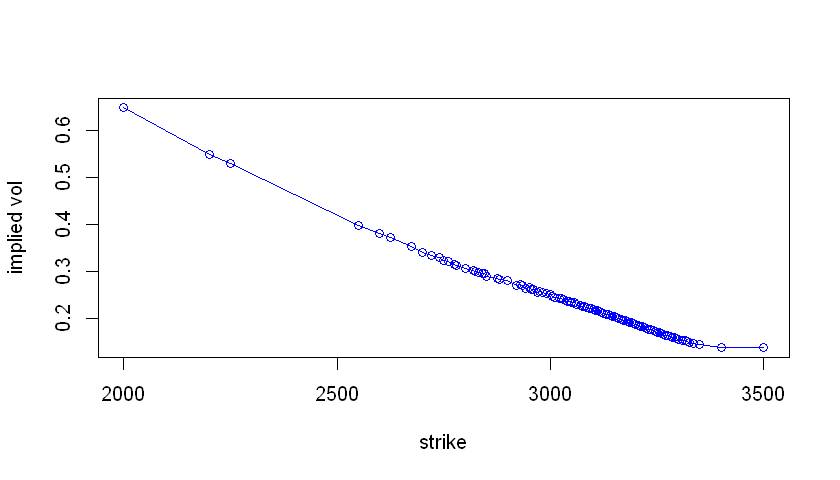

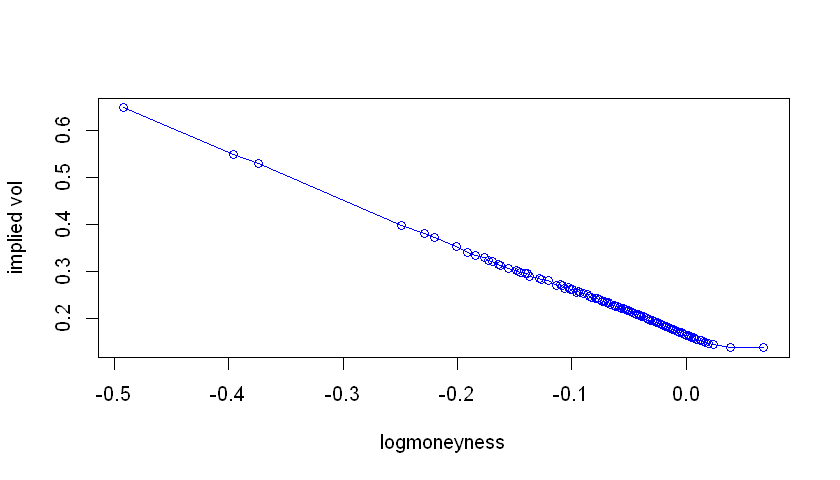

In [32]:
# plot the implied vol vs strikes
plot(ks, impVols, type='o', col='blue', xlab='strike', ylab='implied vol')

# plot the implied vol vs logmoneyness
logmnyns <- log(ks/s_adj)
plot(logmnyns, impVols, type='o', col='blue', xlab='logmoneyness', ylab='implied vol')

## A shorter time to expiry option on SPX

In [32]:
spx.opt <- getOptionChain("^SPX", '2020-07-24')

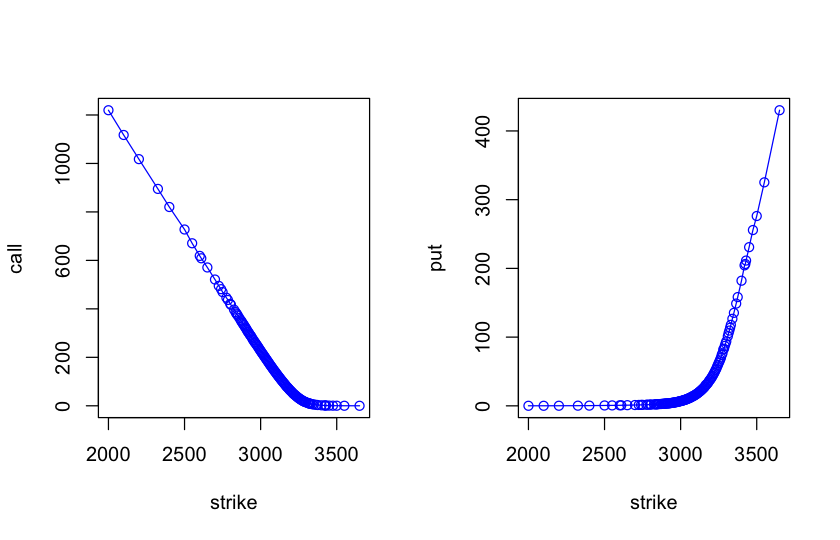

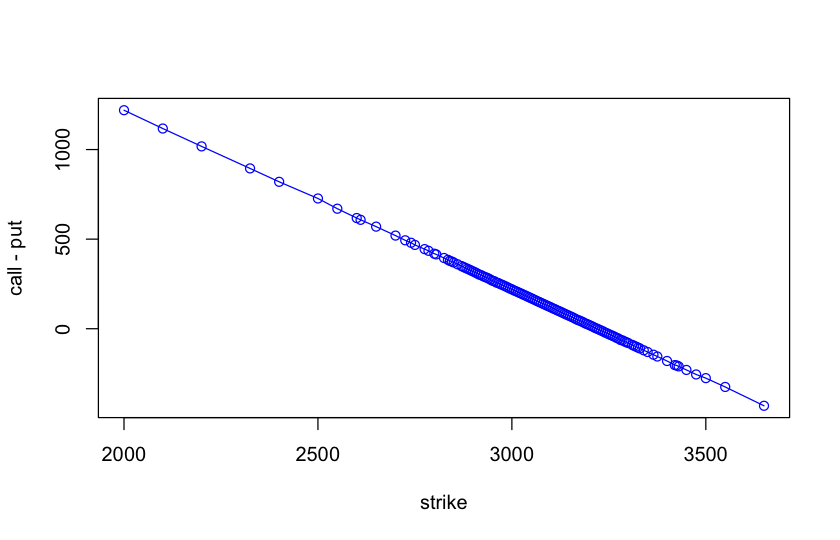

In [42]:
spx.calls <- spx.opt$calls
spx.puts <- spx.opt$puts
c.K <- spx.calls$Strike
p.K <- spx.puts$Strike

# extract calls and puts that have common strikes
ks <- intersect(c.K, p.K)
c.bid <- rep(0, length(ks)) 
c.ask <- rep(0, length(ks))
for (i in 1:length(ks)) {
    c.bid[i] <- spx.calls[spx.calls$Strike==ks[i], ]$Bid
    c.ask[i] <- spx.calls[spx.calls$Strike==ks[i], ]$Ask
}

c.mid <- (c.bid + c.ask)/2

p.bid <- 0*(1:length(ks))
p.ask <- 0*(1:length(ks))
for (i in 1:length(ks)) {
    p.bid[i] <- spx.puts[spx.puts$Strike==ks[i], ]$Bid
    p.ask[i] <- spx.puts[spx.puts$Strike==ks[i], ]$Ask
}

p.mid <- (p.bid + p.ask)/2

par(mfrow=c(1, 2))
plot(ks, c.mid, col='blue', type='o', xlab='strike', ylab='call')
plot(ks, p.mid, col='blue', type='o', xlab='strike', ylab='put')
par(mfrow=c(1, 1))
plot(ks, c.mid - p.mid, col='blue', type='o', xlab='strike', ylab='call - put')

In [43]:
# apply put-call parity 
cp.fit <- lm(c.mid - p.mid ~ ks)
PV <- -coef(cp.fit)[2]
s_adj <- coef(cp.fit)[1]

ks_pv <- PV*ks
T <- 7/252
r <- 0
impVols <- BSImpliedVolCall(s_adj, ks_pv, T, r, c.mid)
impVols

[1] 1.115378e+00 1.727596e-10 1.727596e-10 7.947491e-01 7.519900e-01
  [6] 9.049594e-01 6.248130e-01 1.727596e-10 1.727596e-10 5.400777e-01
 [11] 5.047211e-01 3.965755e-01 4.751403e-01 1.727596e-10 4.295665e-01
 [16] 4.466891e-01 3.951801e-01 4.290490e-01 4.158925e-01 4.076517e-01
 [21] 3.733560e-01 4.048371e-01 4.025622e-01 3.939974e-01 3.853865e-01
 [26] 3.852404e-01 3.718379e-01 3.798290e-01 3.770067e-01 3.730498e-01
 [31] 3.701079e-01 3.670954e-01 3.526525e-01 3.153949e-01 3.567096e-01
 [36] 3.366396e-01 3.368033e-01 3.511164e-01 3.508994e-01 3.311000e-01
 [41] 3.022581e-01 3.397722e-01 3.007939e-01 3.386081e-01 3.245208e-01
 [46] 3.331890e-01 3.303188e-01 3.286138e-01 3.211433e-01 3.161945e-01
 [51] 3.213482e-01 3.098119e-01 3.138297e-01 3.129214e-01 3.112584e-01
 [56] 3.094047e-01 3.073693e-01 3.046864e-01 3.032435e-01 2.997981e-01
 [61] 2.984244e-01 2.947086e-01 2.925452e-01 2.861393e-01 2.880588e-01
 [66] 2.872499e-01 2.805923e-01 2.819531e-01 2.765575e-01 2.776698e-01
 [71] 2.773858e-01 2.705794e-01 2.727236e-01 2.666319e-01 2.662910e-01
 [76] 2.656288e-01 2.632016e-01 2.585321e-01 2.584849e-01 2.561692e-01
 [81] 2.546764e-01 2.528904e-01 2.495108e-01 2.471723e-01 2.392168e-01
 [86] 2.433912e-01 2.416564e-01 2.391125e-01 2.333582e-01 2.347625e-01
 [91] 2.319703e-01 2.297851e-01 2.272448e-01 2.203616e-01 2.234033e-01
 [96] 2.202071e-01 2.194215e-01 2.172960e-01 2.135685e-01 2.132006e-01
[101] 2.107346e-01 2.080469e-01 2.071012e-01 2.057098e-01 2.023040e-01
[106] 2.025397e-01 1.969541e-01 1.995360e-01 1.978269e-01 1.979401e-01
[111] 1.970170e-01 1.932761e-01 1.927459e-01 1.924507e-01 1.916826e-01
[116] 1.911923e-01 1.895447e-01 1.906115e-01 1.902336e-01 1.906501e-01
[121] 1.929167e-01 1.972430e-01 1.973084e-01 1.976806e-01 2.027508e-01
[126] 2.071774e-01 2.146811e-01 2.271064e-01 2.578749e-01

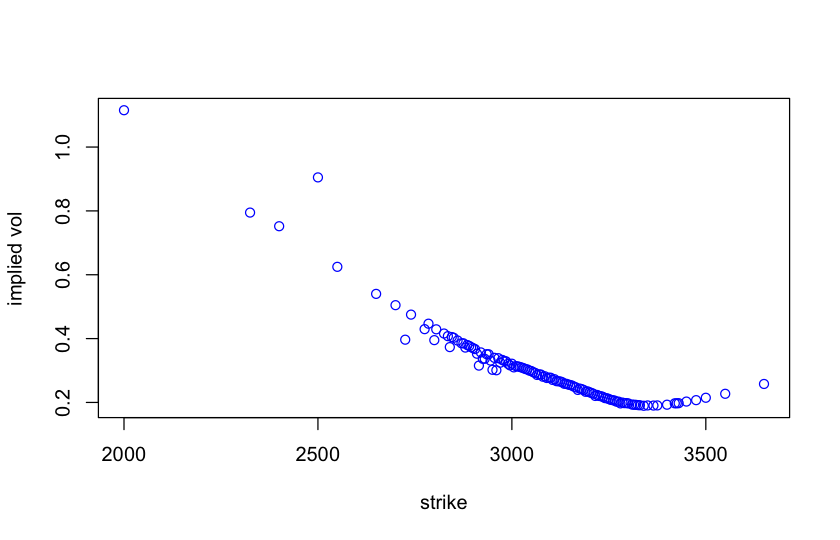

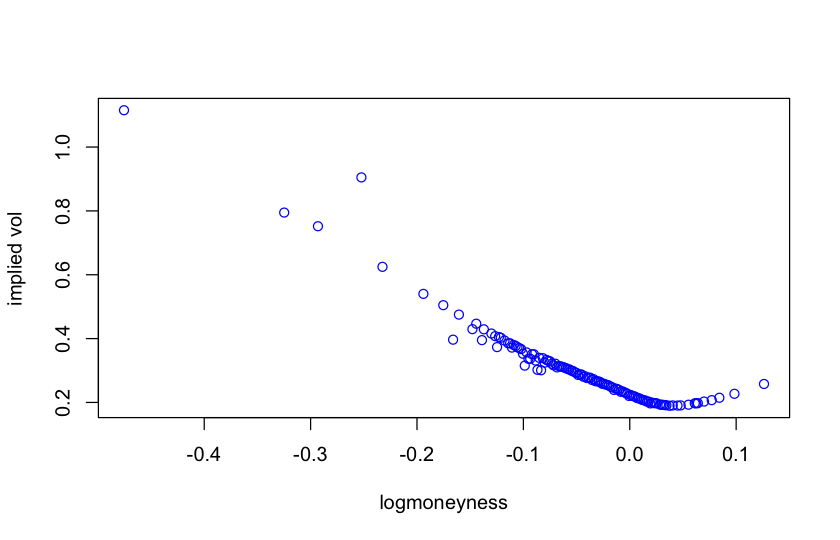

In [47]:
# cleaned up impVols
impVols_cl <- impVols[impVols > 0.05]

# plot the implied vol vs strikes
ks_cl <- ks[impVols > 0.05]
plot(ks_cl, impVols_cl, type='p', col='blue', xlab='strike', ylab='implied vol')

# plot the implied vol vs logmoneyness
logmnyns <- log(ks/s_adj)
logmnyns_cl <- logmnyns[impVols > 0.05]
plot(logmnyns_cl, impVols_cl, type='p', col='blue', xlab='logmoneyness', ylab='implied vol')

## What is VIX?

Quote from [this page](https://www.investopedia.com/terms/v/vix.asp) in Investopedia:

>Created by the Chicago Board Options Exchange (CBOE), the Volatility Index, or VIX, is a real-time market index that represents the market's expectation of 30-day forward-looking volatility. Derived from the price inputs of the S&P 500 index options, it provides a measure of market risk and investors' sentiments. It is also known by other names like "Fear Gauge" or "Fear Index." Investors, research analysts and portfolio managers look to VIX values as a way to measure market risk, fear and stress before they take investment decisions. 

>Introduced in 1993, the Volatility Index (VIX) was initially a weighted measure of the implied volatility (IV) of eight S&P 100 at-the-money put and call options. Ten years later, in 2004, it expanded to use options based on a broader index, the S&P 500. This expansion allows for a more accurate view of investors' expectations on future market volatility. VIX values higher than 30 are usually associated with a significant amount of volatility as a result of investor fear or uncertainty. Values below 15 ordinarily correspond to less stressful, or even complacent, times in the markets.


- Originally, the VIX computation was designed to mimic the implied volatility of an at-the-money 1 month option on the OEX index. It did this by averaging volatilities from 8 options (puts and calls from the closest to ATM strikes in the nearest and next to nearest months).

- The CBOE changed the VIX computation: “CBOE is changing VIX to provide a more precise and robust measure of expected market volatility and to create a viable underlying index for tradable volatility products.”

- CBOE listed futures on the VIX in 2004.

## Volatility indices published by CBOE

In addition to VIX, other volatility indices published by [CBOE](http://www.cboe.com/products/vix-index-volatility/volatility-on-stock-indexes/cboe-s-p-500-9-day-vol-index-vix9d) include

- VIX9D
- VIX3M
- VIX6M
- VOX
- VXD: Dow Jones index volatility
- RVX
- VXN
- VVIX: VIX of VIX.

### Note
More volatility indices published by CBOE can be found in [this link](http://www.cboe.com/Volatility).

## "Formula of finanical engineering"

Notice that all payoffs we saw before can be expressed as a combination of payoffs from calls and puts, even the underlying itself since it can be regarded as a call struck at zero. A natural question to ask is, to what extent, can a given payoff function be represented as a combination of calls and puts?

The answer is surprisingly "all the payoffs"! The following formula shows how. 

Let $\varphi$ be a payoff function, we have

$$
\varphi(s) = \varphi(f) + \varphi'(f)(s - f) + \int_f^\infty (s - k)^+ \varphi''(k) dk + \int_0^f (k - s)^+ \varphi''(k)dk.
$$

Let $\delta$ denote the Dirac delta function and $\theta$ the Heaviside function. Note that heuristically $\theta' = \delta$, i.e., the Dirac delta can be regarded as the derivative of the Heaviside function. 

The payoff $\varphi(s)$ at time $T$ can be written as 

\begin{eqnarray*}
\varphi(s) &=& \int_0^\infty \varphi(k) \delta(s - k)\,dk \\
&=& \int_0^f \varphi(k) \delta(s - k) dk + \int_f^\infty \varphi(k) \delta(s - k) dk \\
&=& \varphi(f) - \int_0^f \varphi'(k) \theta(k - s) dk + \int_f^\infty \varphi'(k)\theta(s - k) dk \\
&=& \varphi(f) + \varphi'(f) (s - f) + \int_0^f \varphi''(k) (k - s)^+ dk + \int_f^\infty \varphi''(k) (s - k)^+ dk.
\end{eqnarray*}

Thus, 

$$
\varphi(S_T) = \varphi(f) + \varphi'(f) (S_T - f) + \int_0^f \varphi''(k) (k - S_T)^+ dk + \int_f^\infty \varphi''(k) (S_T - k)^+ dk.
$$

With $f = \Eof{S_T}$ and taking expectation on both sides, we end up 
\begin{eqnarray*}
\Eof{\varphi(S_T)} &=&
% \int_0^f\,\varphi''(K)\,(K-S_T)^+\,dK + \int_F^\infty\,g''(k)\,(S_T - k)^+\,dK \\
% &&+ g(F) - g'(F)\,\left[ (F-S_T)^+ - (S_T-F)^+ \right] \\
% &=&
 \varphi(f) + \int_0^f \, \varphi''(k) \, P(k) \,dk + \int_f^\infty\, \varphi''(k)\, C(k) \,dk.
\end{eqnarray*}

- The price of any European style contingent claim can be expressed in terms of strips of out-of-money European options. 


## Example - log contract

Consider the log contract $\varphi(s) = \log s$. Since $\varphi'(s) = \frac1s$ and $\varphi''(s) = -\frac1{s^2}$, we obtain

$$
\log s = \log f + \frac{s - f}{f} - \int_0^f \frac{(k - s)^+}{k^2} dk - \int_f^\infty \frac{(s - k)^+}{k^2} dk. 
$$

Thus, 

$$
\Eof{\log S_T} = \log f - \int_0^f \, \frac{P(k)}{k^2} \,dk - \int_f^\infty\, \frac{C(k)}{k^2} \,dk.
$$


On the other hand, assume $S_t$ satisfies the SDE under risk neutral probability with zero interest and dividend rates

$$
\frac{dS_t}{S_t} = \sigma_t dW_t,
$$

by applying Ito's formula to $\log S_t$, we obtain

\begin{eqnarray*}
\log S_T = \log S_0 + \int_0^T \sigma_t dW_t - \frac12 \int_0^T \sigma_t^2 dt.
\end{eqnarray*}

It follows by taking expectation on both sides that 

$$
\Eof{\log S_T} = \log S_0 - \frac12 \Eof{\int_0^T \sigma_t^2 dt}
$$

Compare the two identities we obtain

$$
\frac1T \Eof{\int_0^T \sigma_t^2 dt} = \frac2T \int_0^f \, \frac{P(k)}{k^2} \,dk + \frac2T \int_f^\infty\, \frac{C(k)}{k^2} \,dk.
$$


### Note
- Modulo the diffusion process assumption on the underlying, the last relationship is model-free.  
- VIX is calculated based on this formula with $T$ equal to a month.  


## How is VIX calculated?

VIX definition in the CBOE white paper:

$$VIX^2=\frac{2}{T}\,\sum_i\,\frac{\Delta K_i}{K_i^2}\,
Q_i(K_i)\,-\,\frac{1}{T}\,\left[\frac{F}{K_0}-1\right]^2
$$

where $Q_i$ is the price of the out-of-the-money option with strike
$K_i$ and $K_0$ is the highest strike below the forward price $F$. $T$ is one month.


Use ``quantmod`` to download VIX data

In [2]:
library(quantmod)

In [4]:
#options("getSymbols.warning4.0"=FALSE, "getSymbols.yahoo.warning"=FALSE)
getSymbols('^VIX', from="2012-01-01")

[1] "^VIX"

In [5]:
head(VIX)
tail(VIX)

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2012-01-03    22.95    23.10   22.54     22.97          0        22.97
2012-01-04    23.44    23.73   22.22     22.22          0        22.22
2012-01-05    22.75    23.09   21.34     21.48          0        21.48
2012-01-06    21.24    21.72   20.58     20.63          0        20.63
2012-01-09    21.67    21.78   21.00     21.07          0        21.07
2012-01-10    20.14    20.69   20.05     20.69          0        20.69

           VIX.Open VIX.High VIX.Low VIX.Close VIX.Volume VIX.Adjusted
2020-06-05    24.79    25.09   23.54     24.52          0        24.52
2020-06-08    25.56    25.98   24.65     25.81          0        25.81
2020-06-09    25.93    27.70   25.71     27.57          0        27.57
2020-06-10    26.73    29.01   26.06     27.57          0        27.57
2020-06-11    30.45    42.58   29.49     40.79          0        40.79
2020-06-12    37.68    44.16   34.97     36.09          0        36.09

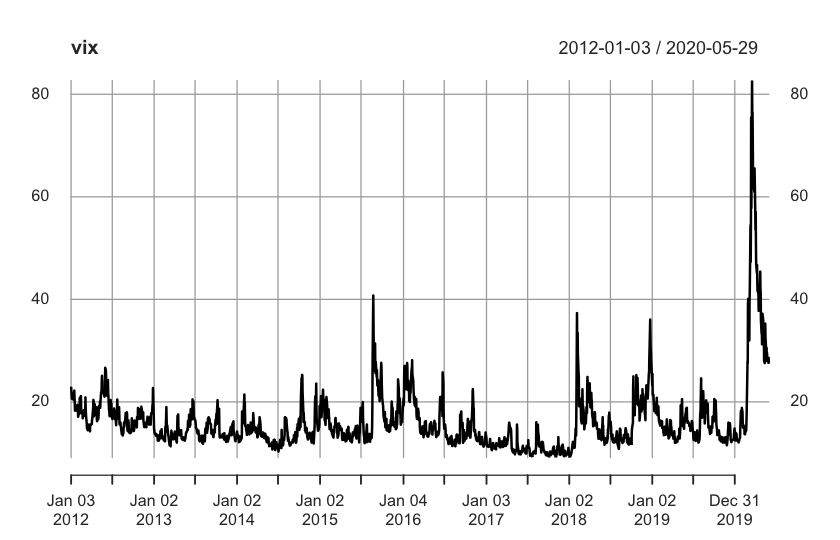

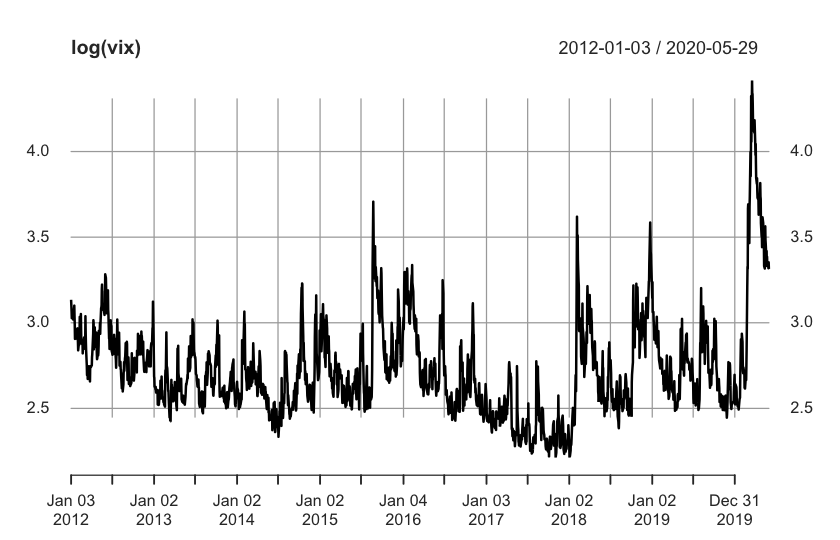

In [39]:
vix <- VIX$VIX.Adjusted
plot(vix)
plot(log(vix))

## The Corsi HAR-RV forecast

The Heterogeneous Autoregressive model for Realized volatility (HAR-RV).

-   The package `highfrequency` implements a regression to
    fit the parameters HAR-RV.

-   HAR-RV can be considered an alternative to GARCH.

-   The model reads

    $$RV_{t,t+h} = \beta_0 + \beta_D\,RV_t + \beta_W\,RV_{t-5,t} + \beta_M\,RV_{t-22,t} + \epsilon_{t,t+h}.$$
    
    In words, the RV forecast for $h$ days from now is a linear
    combination of the current realized variance and (aggregate) RV
    estimates for the last week and the last month.

In [6]:
library(highfrequency)


Attaching package: 'highfrequency'

The following objects are masked from 'package:quantmod':

    getPrice, has.Qty



In [8]:
dji_rv <- realized_library$Dow.Jones.Industrials.Realized.Variance

In [10]:
head(dji_rv)
tail(dji_rv)

Warning message:
: timezone of object (GMT) is different than current timezone ().Warning message:
: timezone of object (GMT) is different than current timezone ().

           Dow.Jones.Industrials.Realized.Variance
1996-01-03                             1.88332e-05
1996-01-04                             7.98423e-05
1996-01-05                             4.20104e-05
1996-01-08                             1.08502e-05
1996-01-09                             3.87930e-05
1996-01-10                             6.57561e-05

Warning message:
: timezone of object (GMT) is different than current timezone ().Warning message:
: timezone of object (GMT) is different than current timezone ().

           Dow.Jones.Industrials.Realized.Variance
2009-02-23                             0.000250420
2009-02-24                             0.000344889
2009-02-25                             0.000434314
2009-02-26                             0.000306039
2009-02-27                             0.000446670
2009-03-01                                     NaN

In [12]:
dji_rv

Warning message:
: timezone of object (GMT) is different than current timezone ().Warning message:
: timezone of object (GMT) is different than current timezone ().

           Dow.Jones.Industrials.Realized.Variance
2008-01-02                            0.0000907162
2008-01-03                            0.0000404920
2008-01-04                            0.0000724594
2008-01-07                            0.0001043010
2008-01-08                            0.0001022930
2008-01-09                            0.0001334460
2008-01-10                            0.0002032830
2008-01-11                            0.0001049180
2008-01-14                            0.0000363370
2008-01-15                            0.0000669582
2008-01-16                            0.0001491480
2008-01-17                            0.0001861050
2008-01-18                            0.0002800160
2008-01-22                            0.0005482380
2008-01-23                            0.0005803630
2008-01-24                            0.0001883520
2008-01-25                            0.0001647130
2008-01-28                            0.0001169540
2008-01-29                     

In [11]:
# Forecasting daily Realized volatility for DJI 2008 using the harModel: HAR-RV
data(realized_library) # Get sample daily Realized Volatility data
dji_rv <- realized_library$Dow.Jones.Industrials.Realized.Variance #Select DJI
dji_rv <- dji_rv[!is.na(dji_rv)] #Remove NA's
dji_rv <- dji_rv['2008']

x <- harModel(data=dji_rv, periods=c(1, 5, 22), RVest=c("rCov"), type="HARRV", h=1,
              transform=NULL)
summary(x)


Call:
"RV1 = beta0  +  beta1 * RV1 +  beta2 * RV5 +  beta3 * RV22"

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0017683 -0.0000626 -0.0000427 -0.0000087  0.0044331 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
beta0 4.432e-05  3.695e-05   1.200   0.2315    
beta1 1.586e-01  8.089e-02   1.960   0.0512 .  
beta2 6.213e-01  1.362e-01   4.560 8.36e-06 ***
beta3 8.721e-02  1.217e-01   0.716   0.4745    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0004344 on 227 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4608 
F-statistic: 66.53 on 3 and 227 DF,  p-value: < 2.2e-16


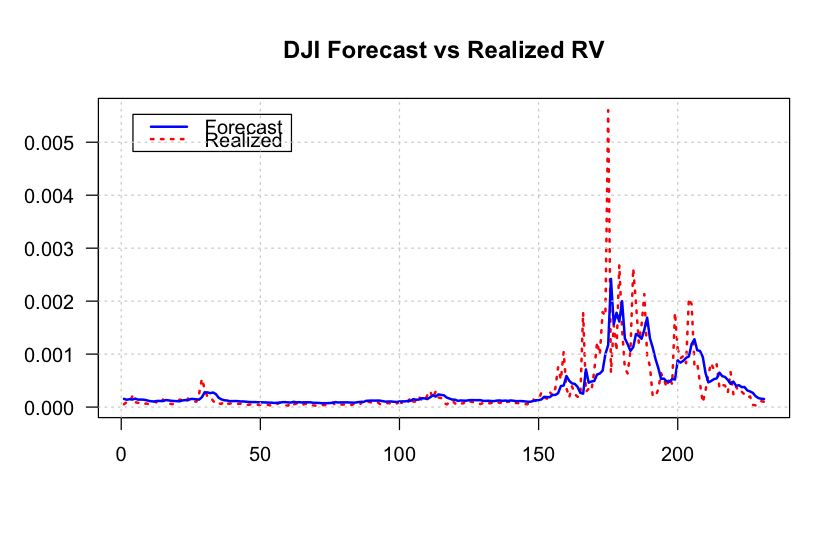

In [45]:
idx <- as.Date(index(as.xts(x$fitted.values)))
plot(as.numeric(dji_rv[idx]), col="red", lwd=2, lty=3, type='l', xlab='', ylab='', las=1, 
     main="DJI Forecast vs Realized RV")
lines(x$fitted.values, type='l', col='blue', lwd=2)
legend("topleft", inset=0.05, legend=c("Forecast", "Realized"), col=c("blue","red"),
       lwd=c(2, 2), lty=c(1, 3))
grid()

## Volatility derivatives

- variance swap
- volatility swap
- VIX futures
- VIX options

## Variance swap

Quote from the [Wikipage](https://en.wikipedia.org/wiki/Variance_swap):

> A variance swap is an over-the-counter financial derivative that allows one to speculate on or hedge risks associated with the magnitude of movement, i.e. volatility, of some underlying product, like an <font color=blue> exchange rate </font>, <font color=blue>interest rate</font>, or stock index.

> One leg of the swap will pay an amount based upon the realized variance of the price changes of the underlying product. Conventionally, these price changes will be daily log returns, based upon the most commonly used closing price. The other leg of the swap will pay a fixed amount, which is the strike, quoted at the deal's inception. Thus the net payoff to the counterparties will be the difference between these two and will be settled in cash at the expiration of the deal, though some cash payments will likely be made along the way by one or the other counterparty to maintain agreed upon margin. 

In summary, a variance swap is a forward contract on realized (annualized) variance whose payoff function ideally is given by  

$$
N \times \left(\frac1T \int_0^T \sigma_t^2 dt - K \right)
$$

where $K$ is the strike and $N$ denotes the notional.


## Volatility swap

Quote from the [Wikipage](https://en.wikipedia.org/wiki/Volatility_swap):

>In finance, a volatility swap is a forward contract on the future realised volatility of a given underlying asset. Volatility swaps allow investors to trade the volatility of an asset directly, much as they would trade a price index.

>The underlying is usually a foreign exchange (FX) rate (very liquid market) but could be as well a single name equity or index. However, the variance swap is preferred in the equity market because it can be replicated with a linear combination of options and a dynamic position in futures.

>Unlike a stock option, whose volatility exposure is contaminated by its stock price dependence, these swaps provide pure exposure to volatility alone. This is truly the case only for forward starting volatility swaps. However, once the swap has its asset fixings its mark-to-market value also depends on the current asset price. One can use these instruments to speculate on future volatility levels, to trade the spread between realized and implied volatility, or to hedge the volatility exposure of other positions or businesses. 


In summary, a volatility swap is a forward contract on realized (annualized) volatility whose payoff function ideally is given by  

$$
N \times \left(\sqrt{\frac1T \int_0^T \sigma_t^2 dt} - K \right)
$$

where $K$ is the strike and $N$ denotes the notional.

## VIX futures

According to the [VIX page](https://cfe.cboe.com/cfe-products/vx-cboe-volatility-index-vix-futures) on CBOE,

>Introduced in 2004 on Cboe Futures Exchange (CFE), VIX futures provide market participants with the ability to trade a liquid volatility product based on the VIX Index methodology. VIX futures reflect the market's estimate of the value of the VIX Index on various expiration dates in the future. VIX futures provide market participants with a variety of opportunities to implement their view using volatility trading strategies, including risk management, alpha generation and portfolio diversification.

## VIX option

Quote from [this page](https://www.investopedia.com/terms/v/vixoption.asp) in Invstopeida 

>A VIX option is a non-equity index option that uses the CBOE Volatility Index as its underlying asset. Call and put VIX options are both available. The call options hedge portfolios against a sudden market decline, and put options hedge against a rapid reversal of short positions on the S&P 500 index. These options thus allow traders and investors to speculate on future moves in volatility.

### References
<br />

<div class="reflist" style="list-style-type: decimal;">

<ol>
  
  <li id="cite_note-Corsi"><span class="mw-cite-backlink"><b><a href="#cite_ref-Corsi">^</a></b></span>Fulvio Corsi, A simple approximate long-memory model of realized
volatility, <span>*Journal of Financial Econometrics*</span>
<span>**7**</span>(2) 174–196 (2009). </li>
  
  <li id="cite_note-ZMA"><span class="mw-cite-backlink"><b><a href="#cite_ref-ZMA">^</a></b></span>Lan Zhang, Per A. Mykland and Yacine Aït-Sahalia, A tale of two time scales: Determining intergrated volatility with noise high-frequency data, <span>*Journal of the American Statistical Association*</span>,
<span>**100**</span>(472), 1394–1411 (2005).
  </li>
  
  <li id="cite_note-Zhou"><span class="mw-cite-backlink"><b><a href="#cite_ref-Zhou">^</a></b></span>Bin Zhou, High-frequency data and volatility in foreign-exchange rates, <span>*Journal of Business & Economic Statistics*</span>, 
<span>**14**</span>(1), 45–52 (1996).
  </li>
</ol>
